In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os

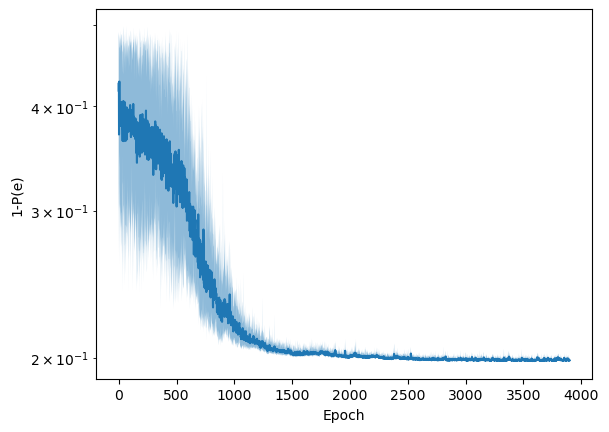

<Figure size 640x480 with 0 Axes>

In [10]:
# Author: Ben Brock 
# Created on May 03, 2023 

root_dir = os.getcwd()
filename = root_dir + r'\save_data\g11-n0-20240806-005758.h5'
run = '12'

f = h5py.File(filename, 'r')

rl_params = {key: item
             for key, item in f[run]['rl_params'].attrs.items()
             }
action_scale = {key: item
                for key, item in f[run]['rl_params']['action_scale'].attrs.items()
                }
action_script = {key: item
                 for key, item in f[run]['rl_params']['action_script'].attrs.items()
                 }
to_learn = {key: item
            for key, item in f[run]['rl_params']['to_learn'].attrs.items()
            }

training_actions = {key: item[()]
                    for key, item in f[run]['training']['actions'].items()
                    }
training_rewards = f[run]['training']['rewards'][()]

evaluation_actions = {key: item[()]
                      for key, item in f[run]['evaluation']['actions'].items()
                      }
evaluation_rewards = f[run]['evaluation']['rewards'][()]

f.close()

# %%

epochs = np.arange(rl_params['num_epochs'])

infidelity = (1 - training_rewards) / 2.0
mean_infidelity = np.mean(infidelity, axis=1)
stdev_infidelity = np.std(infidelity, axis=1)
min_infidelity = np.amin(infidelity, axis=1)
max_infidelity = np.amax(infidelity, axis=1)
fig, ax = plt.subplots(1, 1)
ax.plot(epochs, mean_infidelity)
ax.fill_between(epochs,
                min_infidelity,
                max_infidelity,
                alpha=0.5)
ax.set_xlabel('Epoch')
ax.set_ylabel('1-P(e)')
ax.set_yscale('log')
plt.show()

# %%

# print(training_actions['pulse_array_0'])
# mean_amp0 = np.mean(training_actions['pulse_array_0'][:, 0], axis=1)
# stdev_amp0 = np.std(training_actions['pulse_array_0'][:, 0], axis=1)
# min_amp0 = np.amin(training_actions['pulse_array_0'][:, 0], axis=1)
# max_amp0 = np.amax(training_actions['pulse_array_0'][:, 0], axis=1)
# 
# mean_amp1 = np.mean(training_actions['pulse_array_1'][:, 0], axis=1)
# stdev_amp1 = np.std(training_actions['pulse_array_1'][:, 0], axis=1)
# min_amp1 = np.amin(training_actions['pulse_array_1'][:, 0], axis=1)
# max_amp1 = np.amax(training_actions['pulse_array_1'][:, 0], axis=1)
# 
# mean_drag = np.mean(training_actions['freq_0'], axis=1)
# stdev_drag = np.std(training_actions['freq_0'], axis=1)
# min_drag = np.amin(training_actions['freq_0'], axis=1)
# max_drag = np.amax(training_actions['freq_0'], axis=1)\
# 
# fig, axarr = plt.subplots(3, 1, figsize=(8, 8))
# 
# axarr[0].plot(epochs, mean_amp0)
# axarr[0].fill_between(epochs,
#                       mean_amp0 - stdev_amp0,
#                       mean_amp0 + stdev_amp0,
#                       alpha=0.5)
# axarr[0].set_ylabel('Amp0')
# 
# axarr[1].plot(epochs, mean_amp1)
# axarr[1].fill_between(epochs,
#                       mean_amp1 - stdev_amp1,
#                       mean_amp1 + stdev_amp1,
#                       alpha=0.5)
# axarr[1].set_ylabel('Amp1')
# 
# axarr[2].plot(epochs, mean_drag)
# axarr[2].fill_between(epochs,
#                       mean_drag - stdev_drag,
#                       mean_drag + stdev_drag,
#                       alpha=0.5)
# axarr[2].set_ylabel('Drag')
# axarr[2].set_xlabel('Epoch')

plt.tight_layout()
plt.show()
# %%
